In [3]:
import pandas as pd

carseats = pd.read_csv("../../data/Carseats.csv")
carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [6]:
from ISLP.models import ModelSpec as MS
import statsmodels.api as sm

for col in ['ShelveLoc', 'Urban', 'US']:
    carseats[col] = carseats[col].astype('category')


x = MS(["Price", "Urban", "US"]).fit_transform(carseats)
y = carseats["Sales"]

results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Fri, 18 Jul 2025   Prob (F-statistic):           2.39e-23
Time:                        13:40:24   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban[Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model provides a relatively poor fit, with an R-squared of 0.239, indicating that the selected predictors explain only about 24% of the variance in Sales. Among the predictors, Price has a statistically significant and negative association with Sales, suggesting that lower prices are linked to higher sales. The US variable is also significant, indicating that car seats sold in the U.S. tend to have higher sales. In contrast, the Urban variable is highly insignificant, with a p-value of 0.936, implying that whether a location is urban or not has no meaningful impact on sales in this model.

We can reject the null-hypothesis for both Price and US predictors.

$$
\hat{y} = 13.0435 - 0.0545 \cdot \text{Price} - 0.0219 \cdot \text{Urban}_{\text{Yes}} + 1.2006 \cdot \text{US}_{\text{Yes}}
$$

Where:
- $\text{Urban}_{\text{Yes}} = 1$ if the store is located in an urban area, and 0 otherwise.
- $\text{US}_{\text{Yes}} = 1$ if the store is located in the United States, and 0 otherwise.

In [7]:
x_adjusted = MS(["Price", "US"]).fit_transform(carseats)

results = sm.OLS(y, x_adjusted).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Fri, 18 Jul 2025   Prob (F-statistic):           2.66e-24
Time:                        13:57:20   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US[Yes]        1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Removing the Urban predictor had no effect on the model’s explanatory power, as the R-squared remained unchanged and the Adjusted R-squared improved slightly. This further confirms the statistical insignificance of the Urban variable. However, the overall R-squared is still quite low, indicating that the model explains only a small portion of the variation in Sales. This suggests that additional or alternative predictors may be needed to improve the model’s performance.

In [10]:
results.conf_int(alpha=0.05)

,0,1
intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US[Yes],0.69152,1.707766


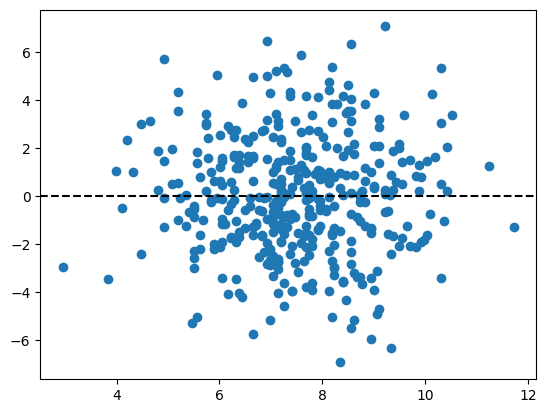

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fitted_values = results.fittedvalues
residuals = results.resid

ax.scatter(fitted_values, residuals);
ax.axhline(0, c="k", ls="--")

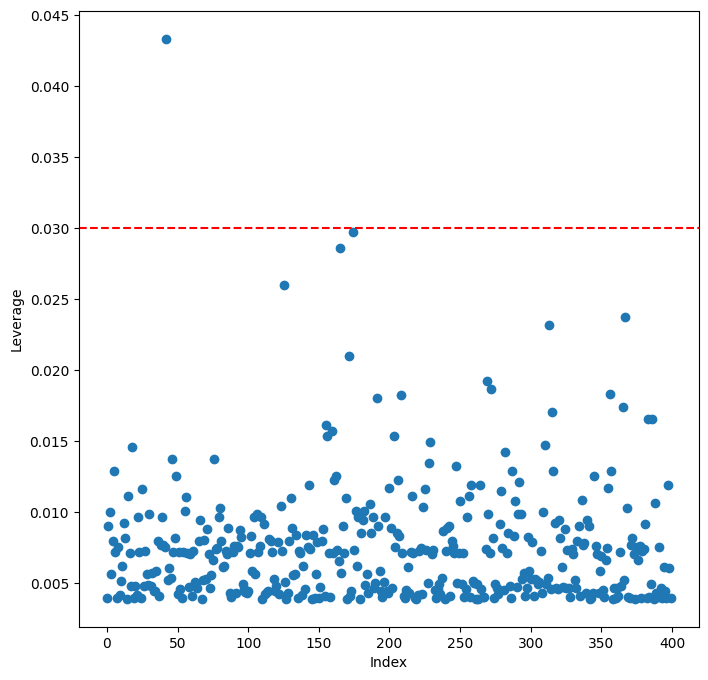

In [12]:
import numpy as np

infl = results.get_influence()
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.arange(x.shape[0]), infl.hat_matrix_diag);
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
ax.axhline(3*x.shape[1] / x.shape[0], c='r', ls='--');

Based on both the leverage and residual plots, there are no significant outliers, as all residuals fall within the range of $[-6, 6]$, indicating no extreme deviations from the model’s predictions. While most leverage values are well below the common threshold of $\frac{3p}{n}$, one point stands out with a leverage of 0.044, which exceeds this cutoff. However, given that this point is not paired with a large residual, it is unlikely to have a disproportionate influence on the model. Overall, the diagnostic plots suggest that the model is generally well-behaved, with only minor influence from high-leverage observations.